# 🌟 Ensemble Learning – Complete Guide

---

## 📘 What is Ensemble Learning?

**Ensemble Learning** is a technique in machine learning where multiple models (called **base learners**) are trained and combined to solve the same problem.

> 🧠 “Wisdom of crowds” – combining multiple weak models often leads to better performance than a single strong model.

---

## 🎯 Why Use Ensemble Methods?

- Reduce **bias** (e.g. Boosting)
- Reduce **variance** (e.g. Bagging)
- Increase **accuracy**
- Improve **robustness**
- Reduce **overfitting**

---

## 🧱 Base Learners Should Be Diverse

Ensemble works better when base models are **diverse**, meaning they:
- Use different algorithms (e.g. SVM, Logistic Regression)
- Or use same algorithm but on different **data subsets** or **feature sets**

---

# 🧠 Types of Ensemble Learning

---

## 1. ✅ Voting

Combines predictions of **different models**.

- **Hard Voting**: Majority class wins
- **Soft Voting**: Average of predicted probabilities

### 🧪 Example:

```python
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)

model.fit(X_train, y_train)


## 2. 🎒 Bagging (Bootstrap Aggregation)

- Trains multiple instances of the **same algorithm** on different random subsets of the data.
- ✅ **Reduces variance**
- ⚙️ **Works in parallel**

### ✅ Famous Example:
**Random Forest** = Bagging + Decision Trees

### 🧪 Example (Python):
```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)


## 🔍 Variants of Bagging

| **Method**          | **Sampling Type**         | **Description**                         |
|---------------------|---------------------------|-----------------------------------------|
| **Pasting**         | Rows (no replacement)     | Train on different subsets              |
| **Bagging**         | Rows (with replacement)   | Classic Bagging                         |
| **Random Subspaces**| Columns only              | Feature-level sampling                  |
| **Random Patches**  | Rows + Columns            | Combined feature + row sampling         |


## 🔁 OOB (Out-of-Bag) Score

- **OOB** helps estimate model performance **without needing a separate validation set**.
- During training, each tree is trained on a bootstrap sample, and the remaining ("out-of-bag") data is used for validation.

### 🧪 Example (Python):
```python
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True)
rf.fit(X_train, y_train)
print("OOB Score:", rf.oob_score_)


## 3. 🔥 Boosting

- Models are trained **sequentially**, with each new model focusing on the **errors made by the previous model**.
- ✅ **Reduces bias**
- ⚡ **More powerful than bagging** in many cases

### 🔥 Popular Boosting Variants
- AdaBoost  
- Gradient Boosting  
- XGBoost  
- LightGBM  
- CatBoost  

### 🧪 Example (Gradient Boosting with Scikit-learn):
```python
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)


## 4. 🔄 Stacking

- Uses **multiple base models**, and their predictions are **fed into a meta-model** for the final prediction.
- 🧠 The **meta-model** learns how to best combine the predictions of base models to improve performance.

### 🧪 Example (Using Scikit-learn):
```python
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

stack = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    final_estimator=LogisticRegression()
)

stack.fit(X_train, y_train)


## 📊 Ensemble Comparison Table

| **Technique** | **Parallel / Sequential** | **Base Models**       | **Focus**         | **Risk**         |
|---------------|----------------------------|------------------------|-------------------|------------------|
| **Voting**    | Parallel                   | Different              | Aggregation       | Underfitting     |
| **Bagging**   | Parallel                   | Same (diff data)       | Reduce variance   | Low variance     |
| **Boosting**  | Sequential                 | Same                   | Reduce bias       | Overfitting      |
| **Stacking**  | Layered                    | Diff or same           | Meta-learning     | Overfitting      |


## 🎯 Prediction Strategy

| **Task**         | **Method**                              |
|------------------|------------------------------------------|
| **Classification** | Majority vote / average probabilities  |
| **Regression**     | Mean of predictions from all models     |

---

## 📈 Real-World Applications

- **Fraud Detection** – Random Forest, XGBoost  
- **Credit Scoring** – Gradient Boosting  
- **Medical Diagnosis** – Bagging / Boosting  
- **Kaggle Competitions** – XGBoost, LightGBM  
- **Marketing Prediction** – Ensemble of Logistic Regression & Trees  



# Ensemble Voting in Machine Learning

Ensemble voting is a technique used to combine the predictions of multiple individual models to produce a final, more robust prediction. It is widely used in classification tasks and can also be applied to regression problems.

---

## How Ensemble Voting Works

- Each model in the ensemble independently makes a prediction on the input data.
- The final prediction is determined by combining these predictions using a specific voting strategy.

---

## Types of Voting

### 1. Hard (Majority) Voting
- **Definition:** Each model predicts a class label, and the class with the most votes becomes the ensemble's final prediction.
- **Usage:** Commonly used when models output discrete class labels.
- **Tie-breaking:** If there is a tie, rules like picking the class with the highest probability or the most confident model can be used.

### 2. Soft Voting
- **Definition:** Each model outputs a probability estimate for each class. The probabilities are averaged (or weighted), and the class with the highest average probability is chosen as the final prediction.
- **Usage:** Used when models can provide probability/confidence scores.

### 3. Weighted Voting
- **Definition:** Assigns different weights to each model's prediction based on their performance or reliability. The final prediction is based on the weighted sum or average of the model predictions.
- **Usage:** Useful when some models are more trustworthy than others. Weights can be set manually or learned.

---

## Benefits of Ensemble Voting

- **Improved Accuracy:** Leverages the strengths of multiple models for better overall performance.
- **Robustness:** Reduces the impact of individual model errors or biases.
- **Model Combination:** Allows combining different types of models (heterogeneous ensembles) or the same type with different configurations (homogeneous ensembles).
- **Interpretability:** Offers insights into model agreement and importance.

---

## Practical Notes

- Voting assumes the models are diverse (different algorithms, hyperparameters, or data subsets) to maximize the benefit.
- Ensemble voting is widely used in fields like finance, healthcare, and computer vision.

---

> **Summary:**  
> Ensemble voting combines the predictions of multiple models using hard (majority), soft (probability-based), or weighted voting. This approach improves accuracy and robustness by leveraging the collective knowledge of diverse models.






# Voting Example
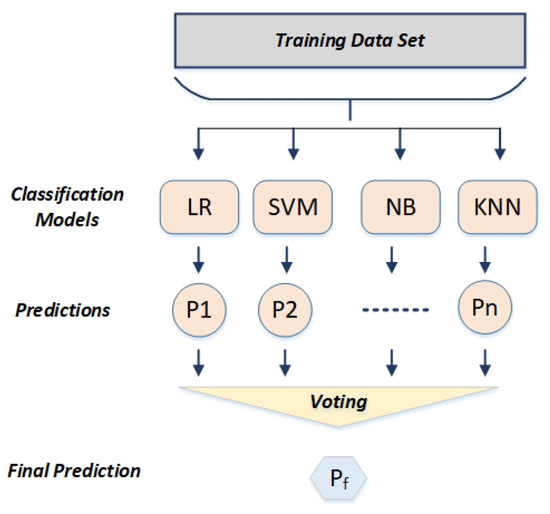



# Understanding Bagging in Ensemble Learning

Bagging, or **Bootstrap Aggregating**, is a fundamental ensemble learning technique that improves model performance by reducing variance. Let's clarify whether bagging involves different models with the same data, the same model with different data, or different models with different data.

---

## What is Bagging?

**Bagging** is an ensemble method designed to improve the stability and accuracy of machine learning algorithms. It works by training multiple instances of the **same algorithm** on **different subsets** of the training data and then combining their predictions.

- **Type:** Homogeneous ensemble (uses the same base model type)
- **Goal:** Reduce variance and overfitting

---

## How Does Bagging Work?

### 1. Bootstrap Sampling

- From the original dataset of size *n*, create multiple new datasets (also of size *n*) by **sampling with replacement**.
- Each new dataset (called a bootstrap sample) may have duplicate entries and omit some original data points.

### 2. Training

- Train the **same type of model** (e.g., decision tree) on each bootstrap sample.

### 3. Aggregation

- **Classification:** Aggregate predictions by majority voting.
- **Regression:** Aggregate predictions by averaging.

---

## Key Points

- **Same Model, Different Data:** Bagging uses multiple instances of the **same model type** trained on **different data subsets** created via bootstrap sampling.
- **Not Different Models:** Bagging does **not** use different types of models. (That would be a heterogeneous ensemble, like stacking.)
- **Not Same Data:** Bagging does **not** train all models on the same data.

---

## Bagging vs. Other Ensembles

| Method         | Model Types Used      | Data Used           |
|----------------|----------------------|---------------------|
| **Bagging**    | Same                 | Different (bootstrap samples) |
| **Boosting**   | Same                 | Weighted, sequentially adjusted |
| **Stacking**   | Different            | Same                |

---

## Example: Bagging Process

1. **Original Data:**  
   `D = {x1, x2, x3, ..., xn}`

2. **Bootstrap Samples:**  
   `D1, D2, D3, ..., Dk` (each sampled with replacement from D)

3. **Train Models:**  
   Train model M1 on D1, M2 on D2, ..., Mk on Dk (all same type, e.g., decision tree)

4. **Aggregate Predictions:**  
   For classification, use majority vote; for regression, use average.

---

## Benefits of Bagging

- Reduces overfitting (especially for high-variance models like decision trees)
- Improves accuracy and robustness
- Works well with high-dimensional data

---

## Conclusion

**Bagging** = Multiple instances of the **same model** trained on **different bootstrap samples** of the data, with predictions aggregated for better performance.

> Bagging leverages data diversity (not model diversity) to create a powerful ensemble.

---

**Popular Example:**  
- **Random Forest**: An extension of bagging applied to decision trees, with additional randomness in feature selection.


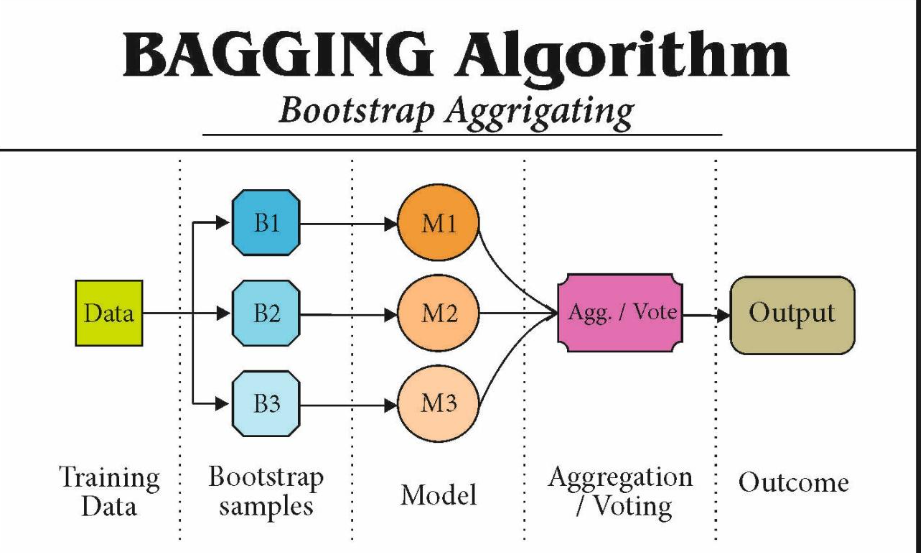


# Understanding Boosting in Ensemble Learning

Boosting is a powerful ensemble technique that builds a strong learner by combining multiple weak learners in a **sequential** manner. Unlike bagging, boosting focuses on correcting the errors made by previous models, giving more attention to difficult cases.

---

## How Boosting Works

1. **Sequential Training**
    - Models are trained one after another.
    - Each new model tries to correct the mistakes of the previous models.

2. **Data Weighting**
    - All data points start with equal weights.
    - After each round, the weights of misclassified samples are increased, so the next model focuses more on those.
    - Correctly classified samples may have their weights decreased.

3. **Model Combination**
    - The final prediction is a weighted sum (or vote) of all the models' outputs.
    - Models that perform better get higher weights in the final prediction.

---

## Key Characteristics

- **Same Base Model:** Usually uses the same type of weak learner (e.g., shallow decision trees).
- **Same Data, Different Weights:** Uses the same dataset, but changes the weights of data points in each round.
- **Reduces Bias and Variance:** Especially effective at reducing bias, and can also reduce variance.
- **Sequential Dependency:** Each model depends on the previous ones.

---

## Boosting vs. Bagging

| Aspect                | Boosting                                      | Bagging                                      |
|-----------------------|-----------------------------------------------|----------------------------------------------|
| Training              | Sequential                                    | Parallel                                     |
| Data Used             | Same data, re-weighted                        | Bootstrap samples (random subsets)           |
| Focus                 | Correcting previous errors                    | Reducing variance                            |
| Model Combination     | Weighted sum/vote                             | Simple averaging/voting                      |
| Overfitting Risk      | Higher (if not regularized)                   | Lower                                        |

---

## Popular Boosting Algorithms

- **AdaBoost**: Adjusts weights on misclassified instances, combines weak learners.
- **Gradient Boosting**: Fits new models to the residual errors (gradients) of previous models.
- **XGBoost, LightGBM, CatBoost**: Efficient, scalable implementations of gradient boosting.

---

## Example: Boosting Process

1. **Initialize** all sample weights equally.
2. **Train** the first model on the data.
3. **Update weights**: Increase weights for misclassified samples.
4. **Train** the next model on the re-weighted data.
5. **Repeat** steps 3-4 for a set number of rounds or until performance stabilizes.
6. **Combine** all models' predictions using their performance-based weights.

---

## Benefits of Boosting

- Can achieve high accuracy, often outperforming bagging.
- Focuses on hard-to-classify examples.
- Works well with weak base learners.

---

## Limitations

- Can overfit if not properly regularized.
- Sensitive to noisy data and outliers.
- Training is slower due to sequential nature.

---

> **Summary:**  
> **Boosting** builds a strong model by sequentially training weak learners, each focusing on the mistakes of the previous ones, and combines their outputs with weighted voting or averaging.



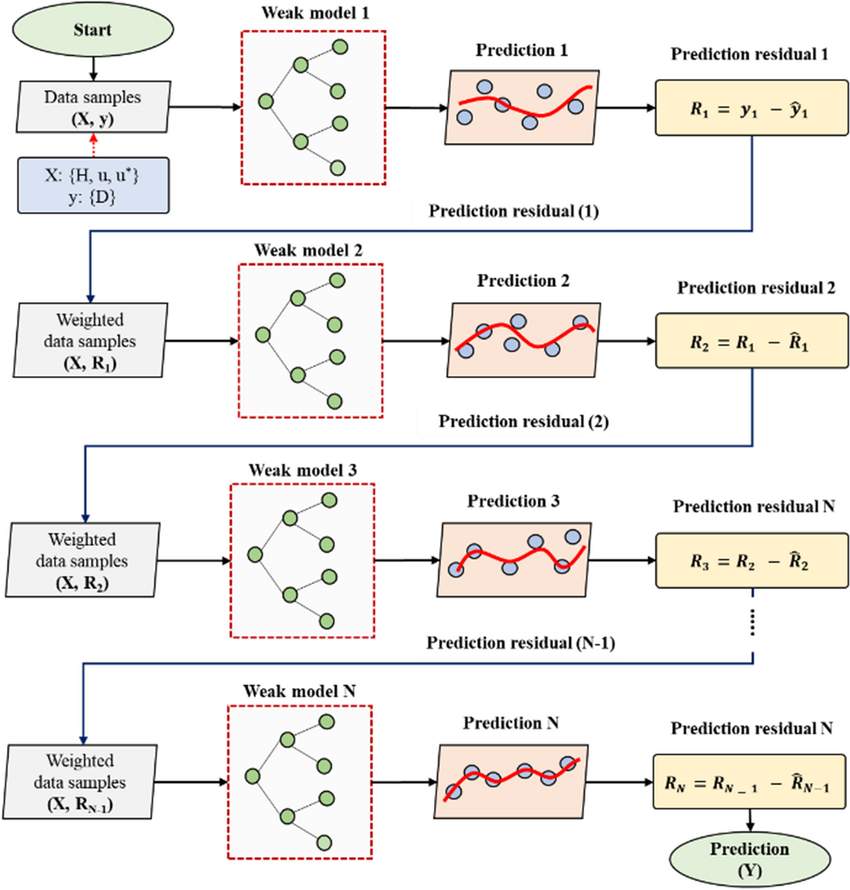


# Stacking in Ensemble Learning

**Stacking** (or *stacked generalization*) is an advanced ensemble learning technique that combines predictions from multiple diverse models (base models) using a higher-level model called a **meta-model** or **meta-learner**.

---

## How Stacking Works

1. **Base Model Training**
   - Multiple different models (e.g., decision trees, SVMs, neural networks) are trained independently on the same dataset.
   - These models are called **base models** or **level-0 models**.

2. **Stacking Data Creation**
   - Each base model makes predictions on the training data.
   - These predictions are collected and used as features to create a new dataset, called the **stacking dataset**.

3. **Meta-Model Training**
   - A new model, the **meta-model** (or **level-1 model**), is trained on the stacking dataset.
   - The meta-model learns how to best combine the predictions of the base models to produce the final output.

4. **Prediction**
   - For new (unseen) data, each base model generates a prediction.
   - These predictions are passed as input features to the meta-model, which produces the final prediction.

---

## Key Characteristics

- **Heterogeneous Models:** Stacking typically uses different types of models as base learners (e.g., decision trees, logistic regression, SVM, neural networks).
- **Meta-Learner:** The meta-model can be any machine learning algorithm (often a simple one like linear or logistic regression).
- **Same Data:** All base models are trained on the same dataset.
- **Reduces Bias and Variance:** By leveraging the complementary strengths of diverse models, stacking aims to reduce both bias and variance.

---

## Stacking vs. Other Ensemble Methods

| Aspect           | Bagging                  | Boosting                    | Stacking                         |
|------------------|--------------------------|-----------------------------|----------------------------------|
| Model Diversity  | Same type                | Same type                   | Different types (heterogeneous)  |
| Training         | Parallel                 | Sequential                  | Parallel (base), then meta-model |
| Data Used        | Bootstrapped samples     | Weighted samples            | Same data                        |
| Final Output     | Voting/Averaging         | Weighted voting/averaging   | Meta-model prediction            |
| Goal             | Reduce variance          | Reduce bias                 | Reduce bias and variance         |

---

## Example Workflow

1. **Train base models:**  
   - Model 1: Decision Tree  
   - Model 2: SVM  
   - Model 3: Neural Network

2. **Generate predictions:**  
   - Each model predicts on the training set (using cross-validation to avoid overfitting).

3. **Create stacking dataset:**  
   - Use the predictions from each base model as features.

4. **Train meta-model:**  
   - Train a logistic regression (or other) meta-model on the stacking dataset.

5. **Make final predictions:**  
   - For new data, get predictions from each base model, feed them to the meta-model, and output the final result.

---

## Benefits of Stacking

- **Combines strengths of different models** for improved accuracy.
- **Flexible:** Can use any machine learning algorithm as base or meta-model.
- **Effective for complex problems** where no single model performs best on its own.

---

## Limitations

- **More complex to implement and tune** than bagging or boosting.
- **Risk of overfitting** if not properly cross-validated.
- **Computationally intensive** due to multiple models and meta-model training.

---

> **Summary:**  
> Stacking is an ensemble method that combines predictions from multiple diverse base models using a meta-model, aiming to leverage the strengths of each for superior predictive performance.



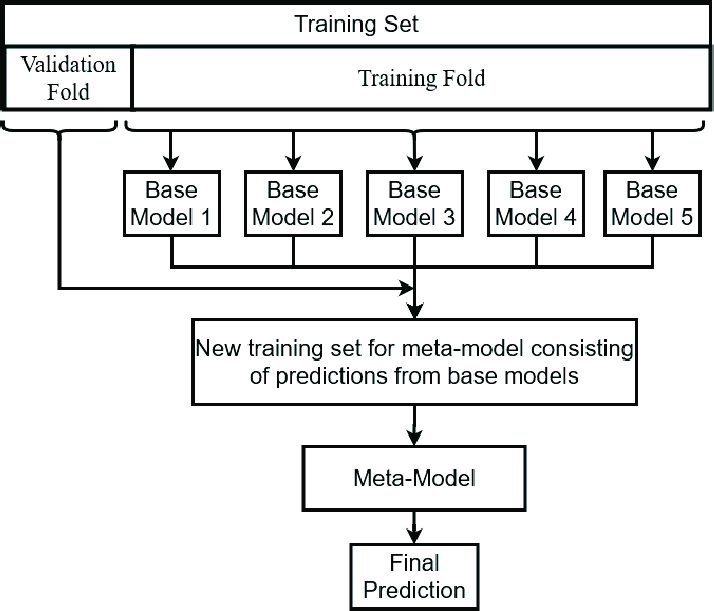